<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/Propri%C3%A9t%C3%A9s_asymptotiques_des_estimateurs_et_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectifs pédagogiques:
* Faire le lien entre les théorèmes aux limites et les types de convergence
* Visiter le biais et la variance des estimateurs convergents.
* Comprendre les propriétés asymptotiques des estimateurs et en quoi elles sont liés aux big data.

Commençons par importer quelques packages.

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
import numpy as np
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## 1. Loi faible des grands nombre
La loi faible des grands nombres garantie que l'estimateur de la moyenne empirique $T_{n}$ converge vers le vrai paramètre lorsque n tend vers l'infini. Quand n représente la quantité de données, on comprend l'importance des big data
Plus généralement, tout estimateur convergent bénéficie des big data.

On va illustrer ce principe dans cette section.
Pour cela on va simuler le jeu d'une pièce de monnaie bien équilibrée, i.e $X_{i} \sim \mathcal{B}(0.5)$. Commençons par afficher la loi empirique pour 50000 lancés.


[Text(0, 0.5, 'Fréquence'), Text(0.5, 0, 'Loi de Bernoulli')]

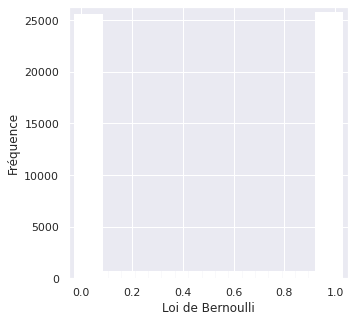

In [5]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=50000,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Loi de Bernoulli', ylabel='Fréquence')

### 1.1 Question
* Récrivez l'estimateur de la moyenne empirique.
* Remplissez la fonction ci-dessous permettant de calculer une estimation en fonction du nombre de données considéré
* Affichez la convergence de l'estimateur $T_{n}$. 
On veut voir la valeur de $T_{10}, T_{20}, \cdots, T_{1000}$ sur un graphe par exemple.

In [17]:
def estimateur_moyenne_empirique(data):
  """
  Input:
    data: Tableau de nombre: le jeu de données    
  Output:
    moyenne: estimation de la moyenne
  """

def evaluate_convergence_estimator(data, estimator, taille_echantillons):
  """
  Input:
    data: le jeu de données considéré
    estimator: l'estimateur dont on veut étudier la convergence
    taille_echantillons: un tableau dont chaque cellule représente une taille d'échantillon
      qu'on utilisera pour effectuer une estimation
  Output:
    evaluations: un tableau représentant une estimation pour chaque échantillon considéré
      dans taille_echantillons   
  """


In [ ]:
# Ce code montre la convergence de l'estimateur de la moyenne empirique
taille_echantillons = np.arange(10,50000,10)
evaluations = evaluate_convergence_estimator(data_bern, estimateur_moyenne_empirique, taille_echantillons)

plt.plot(evaluations)
plt.xlabel(taille_echantillons)

## 2. Théorème Central Limite (TCL)
Le TCL nous informe sur la loi que prend l'estimateur de la moyenne, et cela quelque soit la loi de la variable aléatoire estimée. Pour illustrer ce point, on va choisir deux variables aléatoires:
* Une loi uniforme.
* Une loi empirique, le prix des diamants.


On va ensuite étudier la loi de l'estimateur de la moyenne empirique que l'on notera $T_{n}$ sur chacune de ces variables aléatoires.

Commençons par générer une variable de loi uniforme.

[Text(0, 0.5, 'Fréquence'), Text(0.5, 0, 'Loi uniforme ')]

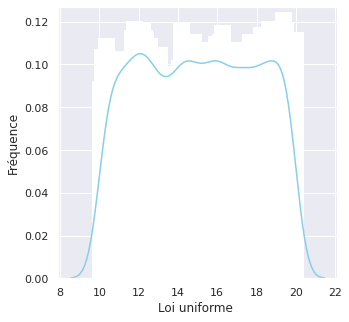

In [14]:
# import uniform distribution
from scipy.stats import uniform

# random numbers from uniform distribution
data_uniform = uniform.rvs(size=10000, loc = 10, scale=10)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Loi uniforme ', ylabel='Fréquence')

Affichons maintenant la loi empirique du prix des diamants.

Text(0.5, 1.0, 'Loi empirique du prix des diamants')

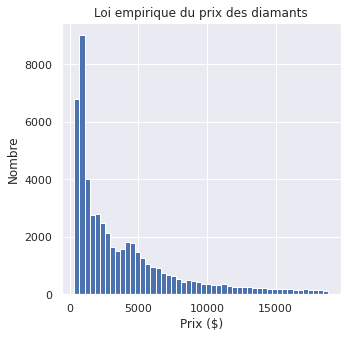

In [10]:
diamond = sns.load_dataset("diamonds")
diamond.keys()
diamond_price = diamond['price']
plt.hist(diamond_price, bins=50)
plt.xlabel("Prix ($)")
plt.ylabel("Nombre")
plt.title("Loi empirique du prix des diamants")

Dans la suite on notera $X \sim \mathcal{U}(10,20)$, $Y$ la variable aléatoire représentant le prix des diamants.

### 2.2 Questions
Dans cette première partie, on cherchera à estimer la loi de l'estimateur $T_{10}$, ou $T_{10}$ requiert 10 tirages pour calculer une estimation. Dans la suite répondez aux questions suivante pour variable aléatoire $X, Y$. Vous pouvez utilisez les estimateurs de numpy.
1. Obtenez 1000 estimations de $T_{10}$.
1. Estimez $\mathbb{E}[T_{10}]$.
1. Estimez $Var(T_{10})$.
1. Tracez un histogramme des estimations de $T_{10}$ pour chaque variable aléatoire. Est-ce que cela ressemble à une loi connue ?

Note, pour tracer un histogramme utilisez `plt.hist(data)` utilisez l'argument `bins` pour affiner votre histogramme. Exemple `plt.hist(data, bins=50)`.


In [ ]:
def evaluate_estimator(data, estimator, taille_echantillon, nb_estimation):
  """
  Input:
    data: (numpy array) le jeu de données considéré
    estimator: (fonction) l'estimateur dont on veut étudier la convergence
    taille_echantillon: (Int) de l'échantillon pour calculer une estimation 
      par exemple il s'agit de n pour Tn.   
    nb_estimation: (Int): Il s'agit du nombre d'estimation dont on a besoin pour évaluer la loi
      de l'estimateur    
  Output:
    evaluations: un tableau composé des différentes estimations
  """


Maintenant, répondez aux mêmes questions avec $T_{100}$. Le but de cet exercice est d'illustrer la convergence de l'estimateur $T_{n}$ vers une loi normale, c'est le théorème central limite: 
$$
\sqrt{n}({T}_{n}-\mathbb{E}(X)) \xrightarrow{\mathcal{L}} \mathcal{N}(0,Var(X))
$$

In [ ]:
uniform_estimation = evaluate_estimator(data_uniform, estimateur_moyenne_vraisemblance, 10, 1000)
diamond_price_estimation = evaluate_estimator(diamond_price, estimateur_moyenne_vraisemblance, 10, 1000)

## 3. Observer la convergence en loi
Nous savons que lorsque n est suffisamment grand (en pratique > 30) alors $T_{n}$ suit une loi normale. Essayez d'afficher la  loi de l'estimateur $T_{n}$ entouré de sa variance pour les v.a X et Y. Complétez la fonction `evaluate_loi_estimator`.
Cette fonction va simuler plusieurs tirages d'un estimateur donné $T_{n}$ de sorte que pour chaque valeur de $n$, nous puissions calculer $\mathbb{E}[T_{n}]$ et $Var[T_{n}]$.
Cela permettra ensuite de tracer la convergence de la loi de $T_{n}$. 

In [12]:
def evaluate_loi_estimator(data, estimator, taille_echantillons, nb_estimation):
  """
  Ce code genere nb_estimation d'un estimator Tn pour des tailles_echantillons n croissantes
  Cela permet par la suite d'observer la convergence de la loi de Tn.
  Input:
    data: (numpy array) le jeu de données considéré
    estimator: (fonction) l'estimateur dont on veut étudier la convergence
    taille_echantillons: un tableau dont chaque cellule représente une taille d'échantillon
      qu'on utilisera pour effectuer une estimation.  
    nb_estimation: (Int): Il s'agit du nombre d'estimation dont on a besoin pour évaluer la loi
      de l'estimateur.    
  Output:
    evaluations: un tableau composé des différentes estimations
  """


In [16]:
# Ce code genere un echantillon de l'estimateur
taille_echantillons = np.arange(50,2500,10)
total_estimations = np.array(evaluate_loi_estimator(data_uniform, np.mean, taille_echantillons, 100))

In [ ]:
# Calcul de la moyenne et de la variance pour chaque valeur de n
total_estimations_mean = total_estimations.mean(axis=1)
total_estimations_std = total_estimations.std(axis=1)

Text(0.5, 1.0, "Convergence en loi de l'estimateur")

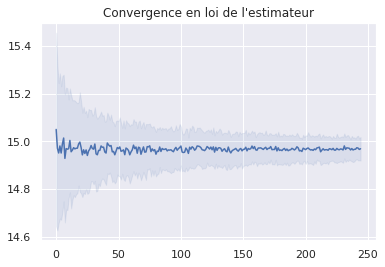

In [ ]:
# On trace la loi de Tn pour chaque valeur de n.
x_axis = np.arange(total_estimations_mean.shape[0])
plt.plot(total_estimations_mean)
plt.fill_between(x_axis, (total_estimations_mean-total_estimations_std), (total_estimations_mean+total_estimations_std), color='b', alpha=.1)
plt.title("Convergence en loi de l'estimateur")